# Multi-Class Prediction of Obesity Risk

#### The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
#Loading Dataset
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#Preparing dataset for modeling:

df = df.drop('id',axis=1) # Dropping ID
df['BMI'] = df.Weight/df.Height #Creating feature : Body Mass Index

label_encoder = LabelEncoder()#Label encoding categorical features

for i in df.columns[[0,4,5,8,9,11,14,15,16]]:
    label_encoder.fit(df[i])
    df[i] = label_encoder.transform(df[i])


In [4]:
#Creating Features and Target df:
X = df.drop('NObeyesdad',axis=1)
y = df.NObeyesdad

In [5]:
#Splitting df into train and test:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier:

In [6]:
from sklearn.tree import DecisionTreeClassifier

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
# Making predictions for both Train and Test df:
y_train_pred = DT_Model.predict(X_train)
y_pred  = DT_Model.predict(X_test)

In [8]:
# Evaluate the model performance:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 0.8448940269749519
Confusion Matrix:
 [[456  54   1   0   0  10   3]
 [ 48 507   1   0   0  62   8]
 [  1   0 436  21   2  27  56]
 [  1   0  27 625   2   0   2]
 [  0   0   1   1 801   0   1]
 [  1  61  25   0   1 327  69]
 [  0  16  54   7   2  79 356]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       524
           1       0.79      0.81      0.80       626
           2       0.80      0.80      0.80       543
           3       0.96      0.95      0.95       657
           4       0.99      1.00      0.99       804
           5       0.65      0.68      0.66       484
           6       0.72      0.69      0.71       514

    accuracy                           0.84      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.84      0.85      4152



### Random Forest Classifier:

In [9]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier()
RF_Model.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
# Making predictions for both Train and Test df:
y_train_pred = RF_Model.predict(X_train)
y_pred  = RF_Model.predict(X_test)

In [11]:
# Evaluate the model performance:
print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 0.8976396917148363
Confusion Matrix:
 [[489  32   0   0   0   2   1]
 [ 32 547   0   0   0  43   4]
 [  2   1 473  13   1  16  37]
 [  0   0  18 636   2   0   1]
 [  0   0   1   1 802   0   0]
 [  1  41   8   0   0 372  62]
 [  0  10  39   6   0  51 408]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       524
           1       0.87      0.87      0.87       626
           2       0.88      0.87      0.87       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.77      0.77       484
           6       0.80      0.79      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



#### Grid Search CV:

In [12]:
#Creating RF model with best hyperparameters:
RF_Model = RandomForestClassifier(n_estimators=250,max_depth=30,min_samples_split=5)
RF_Model.fit(X_train,y_train)
y_train_pred = RF_Model.predict(X_train)
y_pred  = RF_Model.predict(X_test)
print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of train data: 0.9829579669998796
Accuracy of test data: 0.9034200385356455
Confusion Matrix:
 [[492  29   0   0   0   2   1]
 [ 30 549   0   0   0  43   4]
 [  2   1 475  12   1  12  40]
 [  0   0  15 639   2   0   1]
 [  0   0   1   1 802   0   0]
 [  1  37   8   0   0 381  57]
 [  0   9  38   5   0  49 413]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       524
           1       0.88      0.88      0.88       626
           2       0.88      0.87      0.88       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.78      0.79      0.78       484
           6       0.80      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



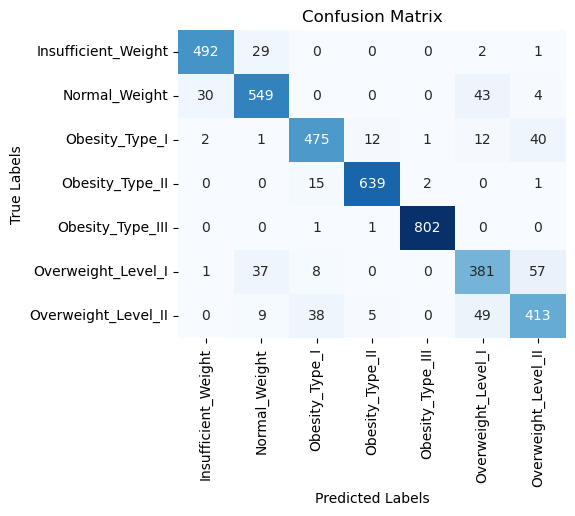

In [13]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
class_labels = np.unique(label_encoder.inverse_transform(df['NObeyesdad']))
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the plot
plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize plot labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

### SVM Classifier:

In [14]:
from sklearn.svm import SVC

SV_Model = SVC()
SV_Model.fit(X_train,y_train)

SVC()

In [15]:
# Making predictions for both Train and Test df:
y_train_pred = SV_Model.predict(X_train)
y_pred  = SV_Model.predict(X_test)

In [16]:
# Evaluate the model performance:

print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of train data: 0.8163314464651331
Accuracy of test data: 0.8174373795761078
Confusion Matrix:
 [[494  28   0   0   0   1   1]
 [106 433   0   0   0  82   5]
 [  2   0 423  22  12   8  76]
 [  0   0  37 588  32   0   0]
 [  0   0   7  20 776   0   1]
 [  2  52   7   0   0 296 127]
 [  0  10  54   3   0  63 384]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       524
           1       0.83      0.69      0.75       626
           2       0.80      0.78      0.79       543
           3       0.93      0.89      0.91       657
           4       0.95      0.97      0.96       804
           5       0.66      0.61      0.63       484
           6       0.65      0.75      0.69       514

    accuracy                           0.82      4152
   macro avg       0.80      0.80      0.80      4152
weighted avg       0.82      0.82      0.82      4152



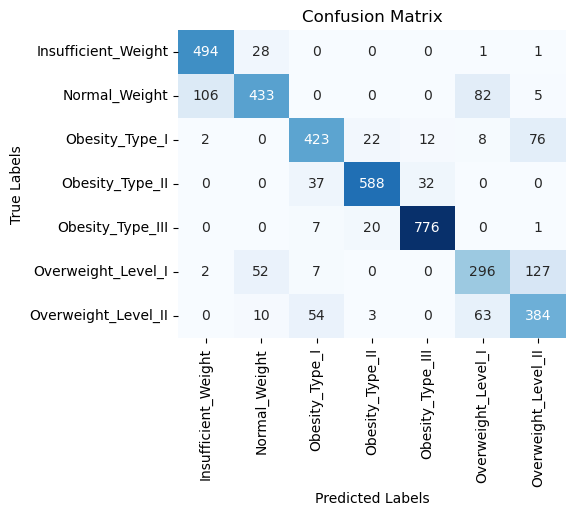

In [17]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
class_labels = np.unique(label_encoder.inverse_transform(df['NObeyesdad']))
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the plot
plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize plot labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

### XGB Classifier:

In [18]:
from xgboost import XGBClassifier


XGB_Model = XGBClassifier()
XGB_Model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
# Making predictions for both Train and Test df:
y_train_pred = XGB_Model.predict(X_train)
y_pred = XGB_Model.predict(X_test)

In [20]:
# Evaluate the model performance:

print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of train data: 0.9881970372154643
Accuracy of test data: 0.9089595375722543
Confusion Matrix:
 [[493  27   0   0   0   3   1]
 [ 26 558   0   0   0  35   7]
 [  2   1 474  10   1  16  39]
 [  0   0  13 639   3   0   2]
 [  0   0   0   1 802   1   0]
 [  1  30  13   0   0 388  52]
 [  0  10  36   3   0  45 420]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       524
           1       0.89      0.89      0.89       626
           2       0.88      0.87      0.88       543
           3       0.98      0.97      0.98       657
           4       1.00      1.00      1.00       804
           5       0.80      0.80      0.80       484
           6       0.81      0.82      0.81       514

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



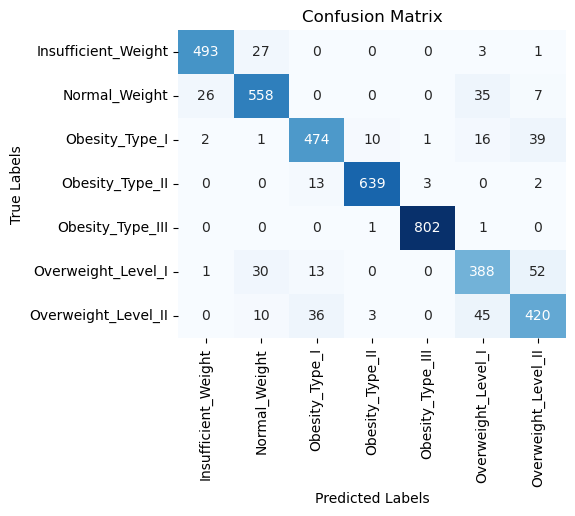

In [21]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
class_labels = np.unique(label_encoder.inverse_transform(df['NObeyesdad']))
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the plot
plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize plot labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

#### Grid Search CV:

### XGB Classifier (with best hyper parameters):

In [22]:
XGB_Model = XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 200)
XGB_Model.fit(X_train,y_train)

# Making predictions for both Train and Test df:
y_train_pred = XGB_Model.predict(X_train)
y_pred = XGB_Model.predict(X_test)

# Evaluate the model performance:

print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of train data: 0.9371913766108635
Accuracy of test data: 0.9065510597302505
Confusion Matrix:
 [[489  32   0   0   0   2   1]
 [ 26 562   0   0   0  30   8]
 [  2   1 472  12   1  15  40]
 [  0   0  12 640   3   0   2]
 [  0   0   0   1 802   1   0]
 [  1  41   9   0   0 380  53]
 [  0   8  37   3   0  47 419]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       524
           1       0.87      0.90      0.89       626
           2       0.89      0.87      0.88       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.80      0.79      0.79       484
           6       0.80      0.82      0.81       514

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



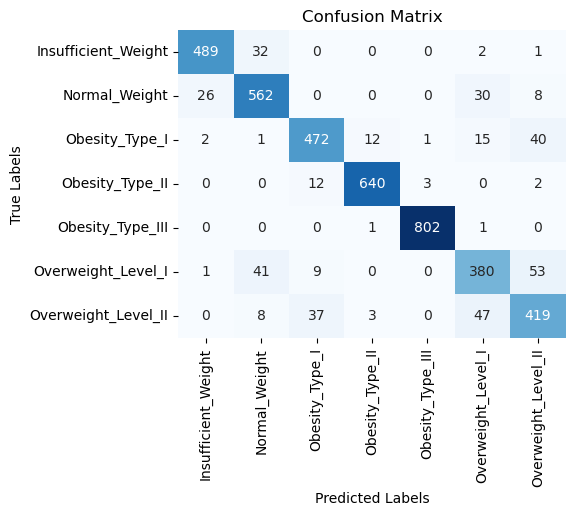

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
class_labels = np.unique(label_encoder.inverse_transform(df['NObeyesdad']))
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Set up the plot
plt.figure(figsize=(5, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Customize plot labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

### Final Model 1:

In [24]:
XGB_Model = XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 200)
XGB_Model.fit(X,y)

y_pred = XGB_Model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the model on train data: {accuracy:.2f}")

Accuracy of the model on train data: 0.93


In [25]:
#Making Predictions For Test Data Set:

#Loading Dataset
df = pd.read_csv('test.csv')
#Preparing dataset for modeling:

df = df.drop('id',axis=1) # Dropping ID
df['BMI'] = df.Weight/df.Height #Creating feature : Body Mass Index

le = LabelEncoder()#Label encoding categorical features

for i in df.columns[[0,4,5,8,9,11,14,15]]:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,65.273262
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,41.250000
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,67.910192
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,66.748641
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,64.419076


In [26]:
NObeyesdad = XGB_Model.predict(df)
df['NObeyesdad'] = NObeyesdad
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,65.273262,3
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,41.250000,5
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,67.910192,4
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,66.748641,2
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,64.419076,4


In [27]:
df['NObeyesdad']=label_encoder.inverse_transform(df['NObeyesdad'])

In [28]:
df_final = pd.read_csv('test.csv')
df_final['NObeyesdad'] = df['NObeyesdad']
df_final = df_final.iloc[:,[0,-1]]
df_final.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [29]:
df_final.to_csv('submission.csv',index=None)

### Final Model 2:

In [30]:
RF_Model = RandomForestClassifier(n_estimators=250,max_depth=30,min_samples_split=5)
RF_Model.fit(X,y)

y_pred = RF_Model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the model on train data: {accuracy:.2f}")

Accuracy of the model on train data: 0.98


In [31]:
#Making Predictions For Test Data Set:

#Loading Dataset
df = pd.read_csv('test.csv')
#Preparing dataset for modeling:

df = df.drop('id',axis=1) # Dropping ID
df['BMI'] = df.Weight/df.Height #Creating feature : Body Mass Index

le = LabelEncoder()#Label encoding categorical features

for i in df.columns[[0,4,5,8,9,11,14,15]]:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,65.273262
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,41.250000
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,67.910192
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,66.748641
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,64.419076


In [32]:
NObeyesdad = RF_Model.predict(df)
df['NObeyesdad'] = NObeyesdad
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,65.273262,3
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,41.250000,5
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,67.910192,4
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,66.748641,2
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,64.419076,4


In [33]:
df['NObeyesdad']=label_encoder.inverse_transform(df['NObeyesdad'])

In [34]:
df_final = pd.read_csv('test.csv')
df_final['NObeyesdad'] = df['NObeyesdad']
df_final = df_final.iloc[:,[0,-1]]
df_final.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [35]:
df_final.to_csv('submission2.csv',index=None)